In [1]:
from main_preprocessing import *
path_tests = 'C:/Users/Simone/Desktop/data/tests.txt'
path_species = 'C:/Users/Simone/Desktop/data/species.txt'
path_results = 'C:/Users/Simone/Desktop/data/results.txt'
path_chemicals = 'data/cas_smiles_pubchem2d.csv'

final_db = load_process_data(path_tests, path_results, path_species, path_chemicals)

tests loaded
species loaded
results loaded
Finding atom number...
Finding number of alone atoms...
Finding single bounds number...
Finding double bounds number...
Finding triple bounds number...
Finding ring number...
Finding mol number...
Finding morgan density...
Finding partition number (LogP)...
Finding number of OH group...


In [2]:
print(final_db.shape)
print(final_db.columns)
final_db.head()

(26846, 26)
Index(['test_cas', 'obs_duration_mean', 'conc1_type', 'fish', 'exposure_type',
       'control_type', 'media_type', 'application_freq_unit', 'conc1_mean',
       'species', 'class', 'tax_order', 'family', 'genus', 'smiles',
       'pubchem2d', 'atom_number', 'alone_atom_number', 'bonds_number',
       'doubleBond', 'tripleBond', 'ring_number', 'Mol', 'MorganDensity',
       'LogP', 'oh_count'],
      dtype='object')


,test_cas,obs_duration_mean,conc1_type,fish,exposure_type,control_type,media_type,application_freq_unit,conc1_mean,species,...,atom_number,alone_atom_number,bonds_number,doubleBond,tripleBond,ring_number,Mol,MorganDensity,LogP,oh_count
0,50-00-0,24.0,A,Actinopterygii Cypriniformes Cyprinidae Pimeph...,F,C,FW,CON,42.5,promelas,...,0.217006,0,0.141094,1,0,0,0.219354,1.5,-0.1849,0
1,50-00-0,48.0,A,Actinopterygii Cypriniformes Cyprinidae Pimeph...,F,C,FW,CON,27.5,promelas,...,0.217006,0,0.141094,1,0,0,0.219354,1.5,-0.1849,0
2,50-00-0,96.0,A,Actinopterygii Cypriniformes Cyprinidae Pimeph...,F,C,FW,CON,24.3,promelas,...,0.217006,0,0.141094,1,0,0,0.219354,1.5,-0.1849,0
3,50-00-0,96.0,A,Actinopterygii Cypriniformes Cyprinidae Pimeph...,S,C,FW,X,26.3,promelas,...,0.217006,0,0.141094,1,0,0,0.219354,1.5,-0.1849,0
4,50-00-0,24.0,A,Actinopterygii Cyprinodontiformes Poeciliidae ...,R,C,FW,E X H,100.0,affinis,...,0.217006,0,0.141094,1,0,0,0.219354,1.5,-0.1849,0


In [11]:
final_db.drop(columns = ['fish'], inplace = True)

In [12]:
print(final_db.shape)
print(final_db.columns)
final_db.head()

(26846, 25)
Index(['test_cas', 'obs_duration_mean', 'conc1_type', 'exposure_type',
       'control_type', 'media_type', 'application_freq_unit', 'conc1_mean',
       'species', 'class', 'tax_order', 'family', 'genus', 'smiles',
       'pubchem2d', 'atom_number', 'alone_atom_number', 'bonds_number',
       'doubleBond', 'tripleBond', 'ring_number', 'Mol', 'MorganDensity',
       'LogP', 'oh_count'],
      dtype='object')


,test_cas,obs_duration_mean,conc1_type,exposure_type,control_type,media_type,application_freq_unit,conc1_mean,species,class,...,atom_number,alone_atom_number,bonds_number,doubleBond,tripleBond,ring_number,Mol,MorganDensity,LogP,oh_count
0,50-00-0,24.0,A,F,C,FW,CON,42.5,promelas,Actinopterygii,...,0.217006,0,0.141094,1,0,0,0.219354,1.5,-0.1849,0
1,50-00-0,48.0,A,F,C,FW,CON,27.5,promelas,Actinopterygii,...,0.217006,0,0.141094,1,0,0,0.219354,1.5,-0.1849,0
2,50-00-0,96.0,A,F,C,FW,CON,24.3,promelas,Actinopterygii,...,0.217006,0,0.141094,1,0,0,0.219354,1.5,-0.1849,0
3,50-00-0,96.0,A,S,C,FW,X,26.3,promelas,Actinopterygii,...,0.217006,0,0.141094,1,0,0,0.219354,1.5,-0.1849,0
4,50-00-0,24.0,A,R,C,FW,E X H,100.0,affinis,Actinopterygii,...,0.217006,0,0.141094,1,0,0,0.219354,1.5,-0.1849,0


In [13]:
final_db.to_csv('data/lc_db_processed.csv')

In [15]:
usedb = final_db.copy()

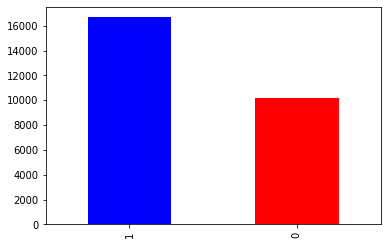

In [16]:
target = usedb.conc1_mean.values
target = np.where(target > 1, 1, 0)
pd.Series(target).value_counts().plot(kind='bar', color=['blue','red'])

In [17]:
lst = usedb.select_dtypes('object').columns.tolist()
lst.remove('smiles')
lst.remove('pubchem2d')

In [18]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(dtype = int)
encoder.fit(usedb[lst])
usedb[lst] = encoder.transform(usedb[lst])+1

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(usedb.drop(columns = ['test_cas', 'conc1_mean','smiles','pubchem2d']),
                                                    target, test_size = 0.33, random_state = 42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8115124153498872

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9153498871331829

In [2]:
import itertools

options = {'fit_intercept': [False, True],
               'l1_ratio': [i/10 for i in range(0,11)],
               'C': [10**i for i in range(-3,3)]}

keys = options.keys()
values = (options[key] for key in keys)
combinations = [dict(zip(keys, combination)) for combination in itertools.product(*values)]
print(len(combinations))

132


In [6]:
from sklearn.model_selection import ParameterSampler

list(ParameterSampler(options, n_iter = 133))


C:\Users\Simone\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 132 is smaller than n_iter=133. Running 132 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


[{'l1_ratio': 0.0, 'fit_intercept': False, 'C': 0.001},
 {'l1_ratio': 0.1, 'fit_intercept': False, 'C': 0.001},
 {'l1_ratio': 0.2, 'fit_intercept': False, 'C': 0.001},
 {'l1_ratio': 0.3, 'fit_intercept': False, 'C': 0.001},
 {'l1_ratio': 0.4, 'fit_intercept': False, 'C': 0.001},
 {'l1_ratio': 0.5, 'fit_intercept': False, 'C': 0.001},
 {'l1_ratio': 0.6, 'fit_intercept': False, 'C': 0.001},
 {'l1_ratio': 0.7, 'fit_intercept': False, 'C': 0.001},
 {'l1_ratio': 0.8, 'fit_intercept': False, 'C': 0.001},
 {'l1_ratio': 0.9, 'fit_intercept': False, 'C': 0.001},
 {'l1_ratio': 1.0, 'fit_intercept': False, 'C': 0.001},
 {'l1_ratio': 0.0, 'fit_intercept': True, 'C': 0.001},
 {'l1_ratio': 0.1, 'fit_intercept': True, 'C': 0.001},
 {'l1_ratio': 0.2, 'fit_intercept': True, 'C': 0.001},
 {'l1_ratio': 0.3, 'fit_intercept': True, 'C': 0.001},
 {'l1_ratio': 0.4, 'fit_intercept': True, 'C': 0.001},
 {'l1_ratio': 0.5, 'fit_intercept': True, 'C': 0.001},
 {'l1_ratio': 0.6, 'fit_intercept': True, 'C': 0.001},